In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [31]:
df = pd.read_csv('./ressource/Brief-Dataset-Consumption.csv' , index_col='Date', parse_dates=True)
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


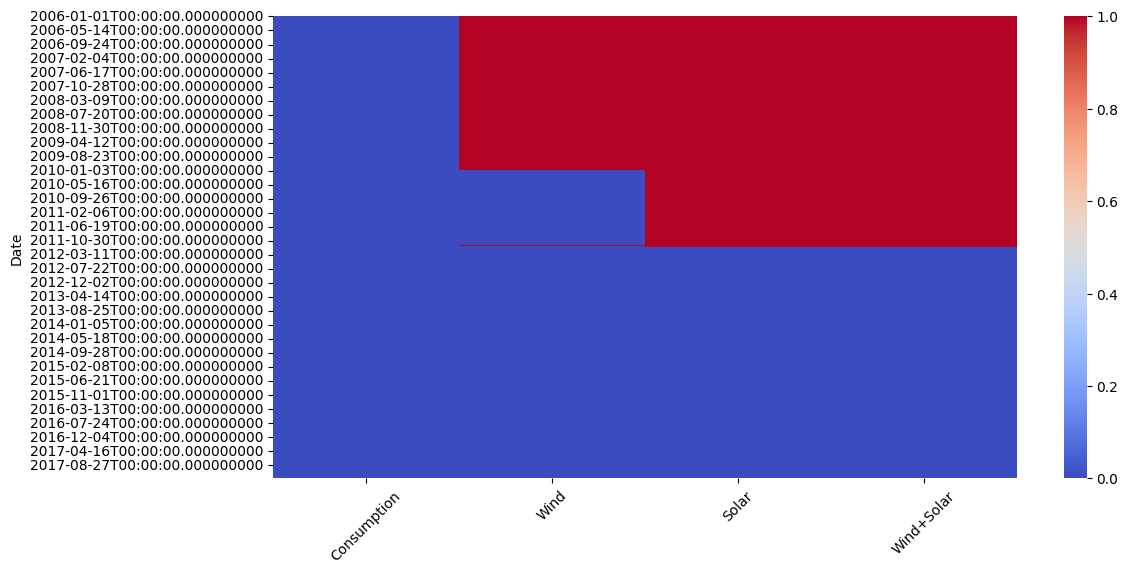

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.isna(), cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.show()

In [33]:
df['Consumption'].dtype

dtype('float64')

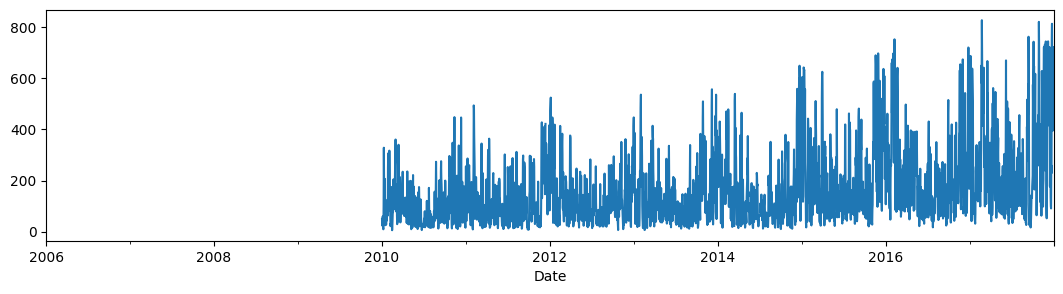

In [34]:
df['Wind'].plot(figsize=(13, 3))
plt.show()

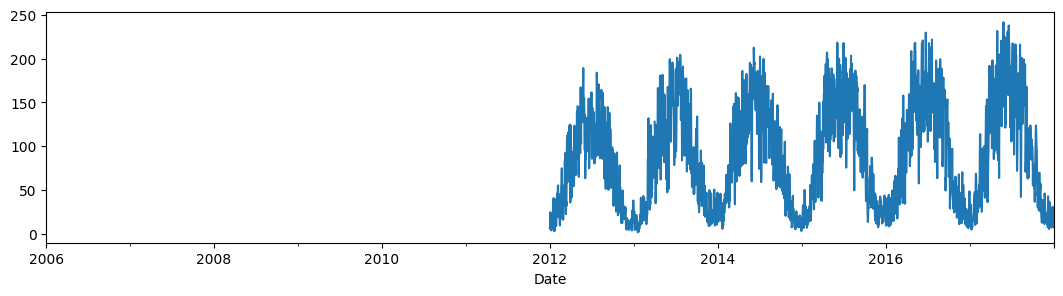

In [35]:
df['Solar'].plot(figsize=(13, 3))
plt.show()

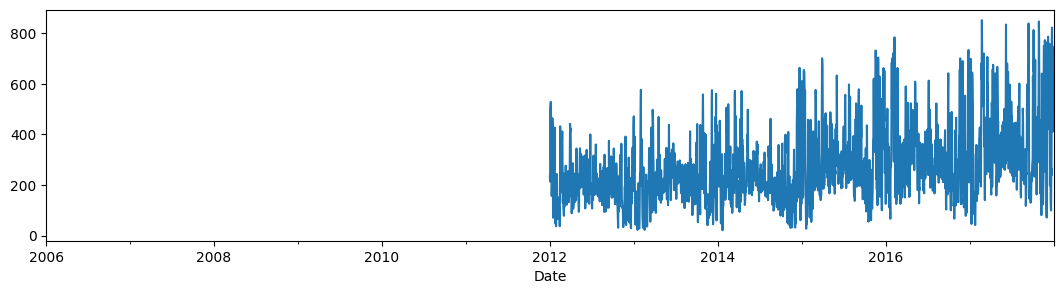

In [36]:
df['Wind+Solar'].plot(figsize=(13, 3))
plt.show()

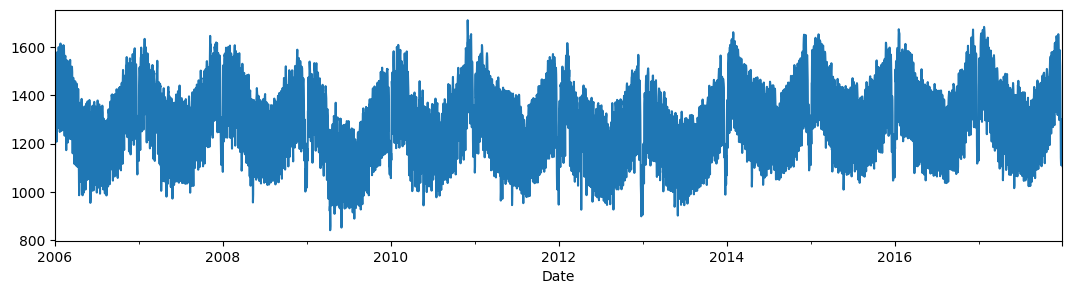

In [37]:
df['Consumption'].plot(figsize=(13, 3))
plt.show()

In [38]:
dfadfu = adfuller(df['Consumption'], autolag='AIC')

dfoutput = pd.Series(dfadfu[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dfadfu[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Test Statistic                -6.239148e+00
p-value                        4.744055e-08
#Lags Used                     3.100000e+01
Number of Observations Used    4.351000e+03
Critical Value (1%)           -3.431854e+00
Critical Value (5%)           -2.862205e+00
Critical Value (10%)          -2.567124e+00
dtype: float64


In [39]:
df['Consumption'].dtype

dtype('float64')

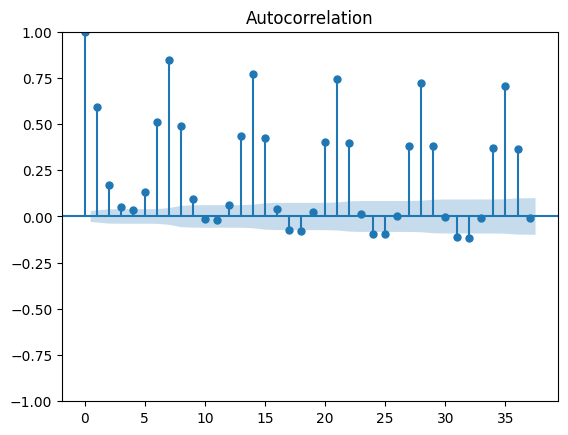

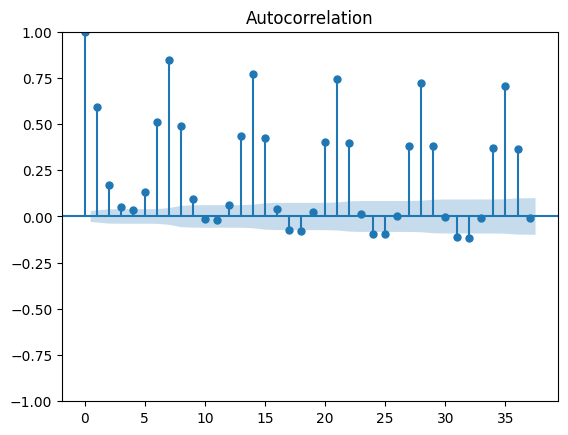

In [40]:
import statsmodels.tsa.stattools as stattools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF
plot_acf(df['Consumption'])

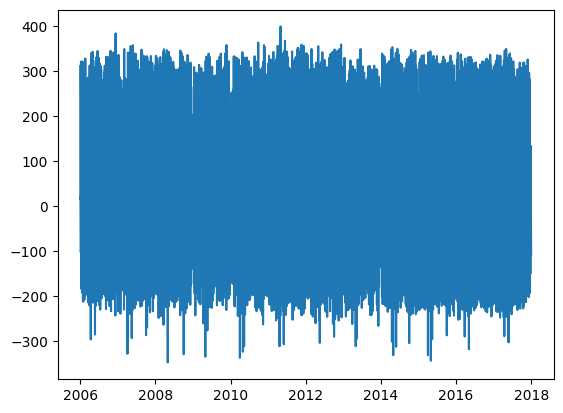

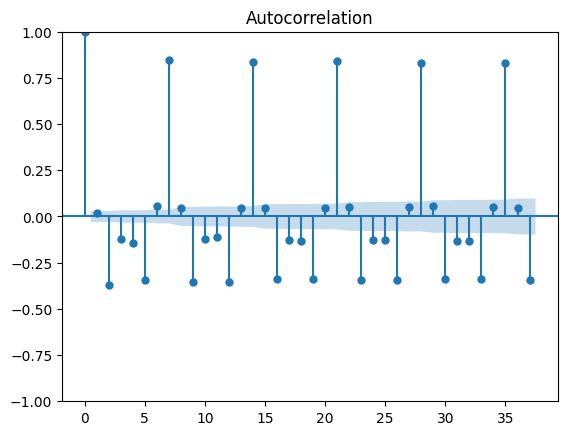

In [41]:
plt.plot(df['Consumption'].diff())
plot_acf(df['Consumption'].diff().dropna())
plt.show()

In [42]:
import matplotlib.pylab as plt #for visualization


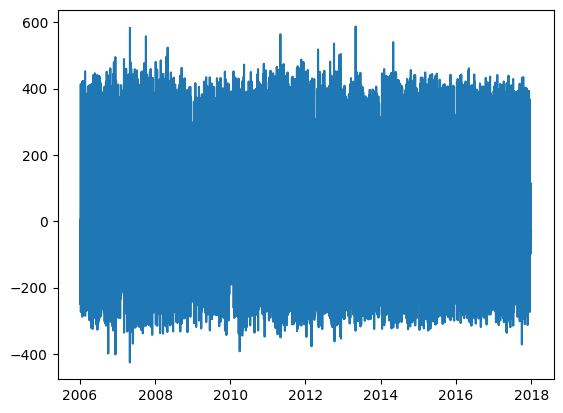

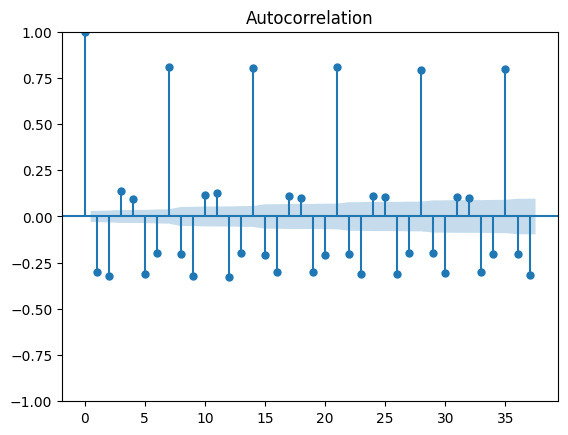

In [43]:
# 2nd Differencing
plt.plot(df['Consumption'].diff().diff())
plot_acf(df['Consumption'].diff().diff().dropna())
plt.show()

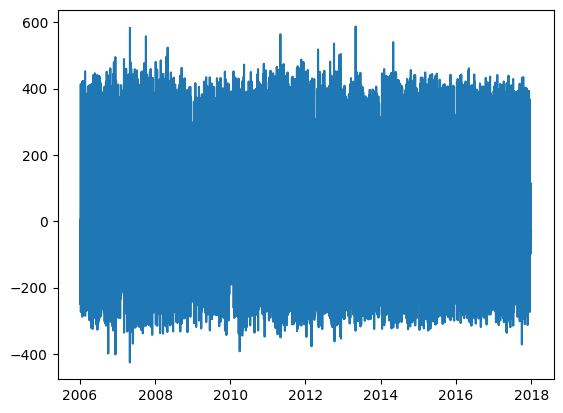

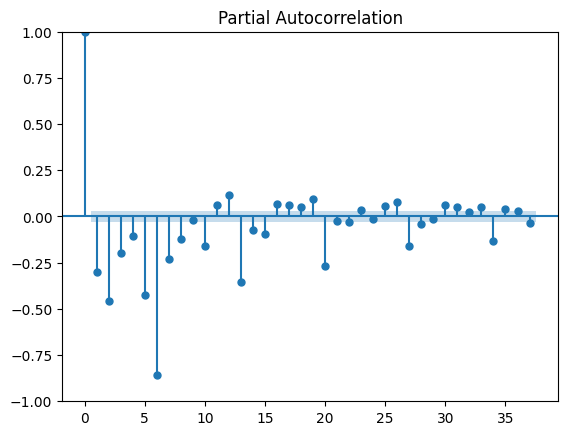

In [44]:
# PACF plot of 2st differenced series
plt.plot(df['Consumption'].diff().diff())
plot_pacf(df['Consumption'].diff().diff().dropna())
plt.show()

In [45]:

train_data = df['Consumption'].iloc[:-365]
test_data = df['Consumption'].iloc[-365:]
presantation_data = df['Consumption'].iloc[(-365*2):]

In [46]:
from tbats import TBATS

model = TBATS( seasonal_periods=[7, 365])
results=model.fit(train_data)

print(results.summary())

Use Box-Cox: False
Use trend: False
Use damped trend: False
Seasonal periods: [  7. 365.]
Seasonal harmonics [ 3 21]
ARMA errors (p, q): (5, 1)
Smoothing (Alpha): 0.089522
Seasonal Parameters (Gamma): [ 5.09277047e-06 -5.12748876e-05 -7.82881167e-05  9.10954551e-06]
AR coefficients [-7.82881167e-05  9.10954551e-06  5.95789821e-03 -1.02537852e-01
 -5.38457916e-02]
MA coefficients [0.41883828]
Seed vector [ 1.40211007e+03 -1.37308475e+02 -6.77951490e+01 -3.04250471e+01
  5.37090279e+01  4.56805036e+01  1.92383645e+01  9.19170786e+01
 -2.05049719e+00 -3.27971900e+01 -2.10995102e+01 -3.07556202e+01
 -1.57255358e+01 -2.41557404e+01 -2.26387292e+01 -1.48725172e+01
 -1.05452776e+01 -1.18913239e+01 -1.69000927e+01 -1.18150546e+01
 -5.02540545e+00 -6.72133399e+00 -6.76404233e+00 -6.04666384e+00
 -5.90882211e+00 -4.93036257e+00 -1.69628079e+00 -4.10208959e+00
  6.72454540e+00  7.99734903e+00  5.97092079e+00 -3.92929106e+00
 -1.57140145e-01  8.51715894e+00  1.87050402e+00  6.52449355e+00
  8.1373

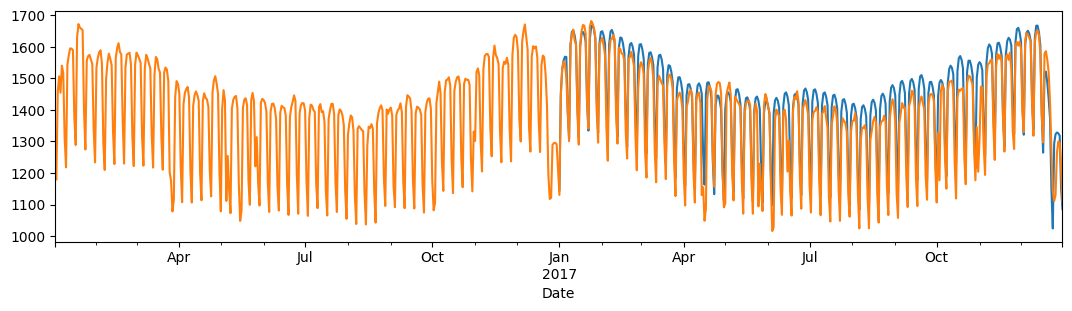

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
predicted_values = results.forecast(365,)# Convert the predicted values to a Pandas Series
predicted_values_series = pd.Series(predicted_values)
# Superposez les données
date_range = pd.date_range(start='1/1/2017', end='12/31/2017')

# Set the date range as the index of the predicted_values_series
predicted_values_series.index = date_range
# Plot the predicted values
predicted_values_series.plot(figsize=(13, 3))
#test_data.plot(figsize=(13, 3))
presantation_data.plot(figsize=(13, 3))
plt.show()


In [48]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_data, predicted_values_series)
mae

52.122062120947064

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data, predicted_values_series)
mape

4.043177200725304

In [50]:
def mean_directional_accuracy(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((np.sign(y_true - y_pred) == np.sign(y_true - np.roll(y_true, 1))).astype(int))

mda = mean_directional_accuracy(test_data, predicted_values_series)
mda

0.536986301369863

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_data, predicted_values_series))
rmse

73.16612693193856

In [53]:
print('Erreur de prévision mae :', mae)
print('Erreur de prévision mape :', mape)
print('Erreur de prévision mda :', mda)
print('Erreur de prévision RMSE :', rmse)


Erreur de prévision mae : 52.122062120947064
Erreur de prévision mape : 4.043177200725304
Erreur de prévision mda : 0.536986301369863
Erreur de prévision RMSE : 73.16612693193856


medhode naive


In [57]:
df2 = df.drop('2016-2-29')
last_value = df2.loc['2016']['Consumption']
prediction_2017 = last_value



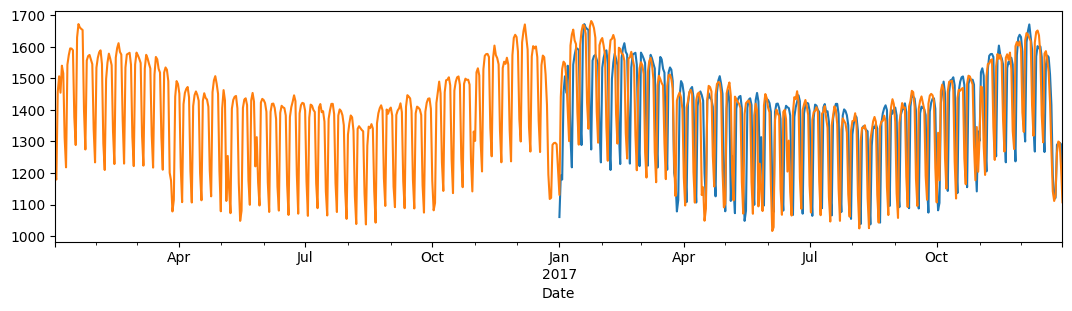

In [59]:

# Superposez les données
date_range = pd.date_range(start='1/1/2017', end='12/31/2017')

# Set the date range as the index of the predicted_values_series
prediction_2017.index = date_range
# Plot the predicted values
prediction_2017.plot(figsize=(13, 3))
#test_data.plot(figsize=(13, 3))
presantation_data.plot(figsize=(13, 3))
plt.show()

In [60]:

mae = mean_absolute_error(test_data, prediction_2017)

rmse = np.sqrt(mean_squared_error(test_data, prediction_2017))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(test_data, prediction_2017)


def mean_directional_accuracy(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((np.sign(y_true - y_pred) == np.sign(y_true - np.roll(y_true, 1))).astype(int))
mda = mean_directional_accuracy(test_data, prediction_2017)


In [61]:
print('Erreur de prévision mae :', mae)
print('Erreur de prévision mape :', mape)
print('Erreur de prévision mda :', mda)
print('Erreur de prévision RMSE :', rmse)


Erreur de prévision mae : 116.29897093150689
Erreur de prévision mape : 8.662148170835778
Erreur de prévision mda : 0.8328767123287671
Erreur de prévision RMSE : 164.13874765471704
